In [1]:
!pip install gplearn # Needed for GP programming
!pip install feyn # Needed for Qlattice

# Week 03 Advanced Topic 2: Symbolic Regression



 Presented by: Aria Alinejad, Aleksei Berdiuzhenko, Saygin Ileri, Amanda Ledell



 11.09.2024

# What is Symbolic Regression?



*   other regression methods:

predefine a model and fit the parameters


*   symbolic regression:

free-form of exploration of formulas (addition, multiplication, exponentiation, logarithms, trigonometric functions, etc.)

# Motivation

in physics, engineering, biology, medicine, finance and general data science,



*   the dataset can be quite **large** and **complex**,


*   where no **domain knowledge** exists,


*   to **uncover** linear/non-linear relationships in these environments..


# an example - pseduo code


1.   initialize with a population size
2.   define number of generations, for each;
3.   evaluate how fit each individual
4.   select highly fit people
5.   generate offspring by crossover of selected people
6.   mutate the offspring
7.   replace the old population with the new offspring (mutated)
8.   repeat until you get the best fitness of individuals


# Genetic Programming (GP)

- make random elements

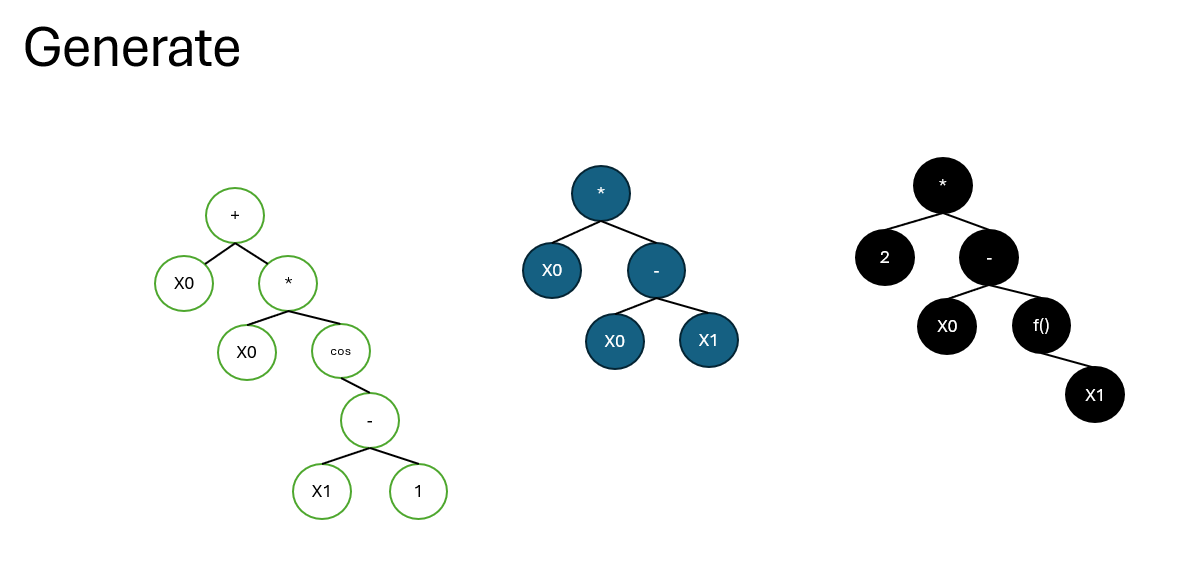

- probabilistically choose better performing individuals (to next gen.)

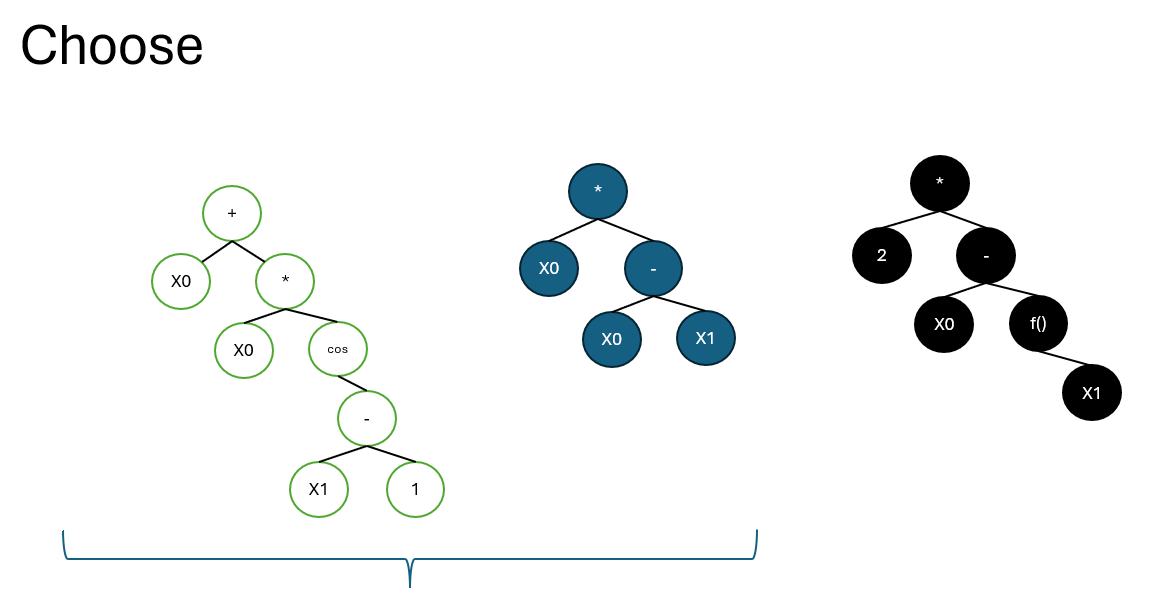

- combine these in diff. ways (based on probs.)
  - crossover
  - mutation
  - replication

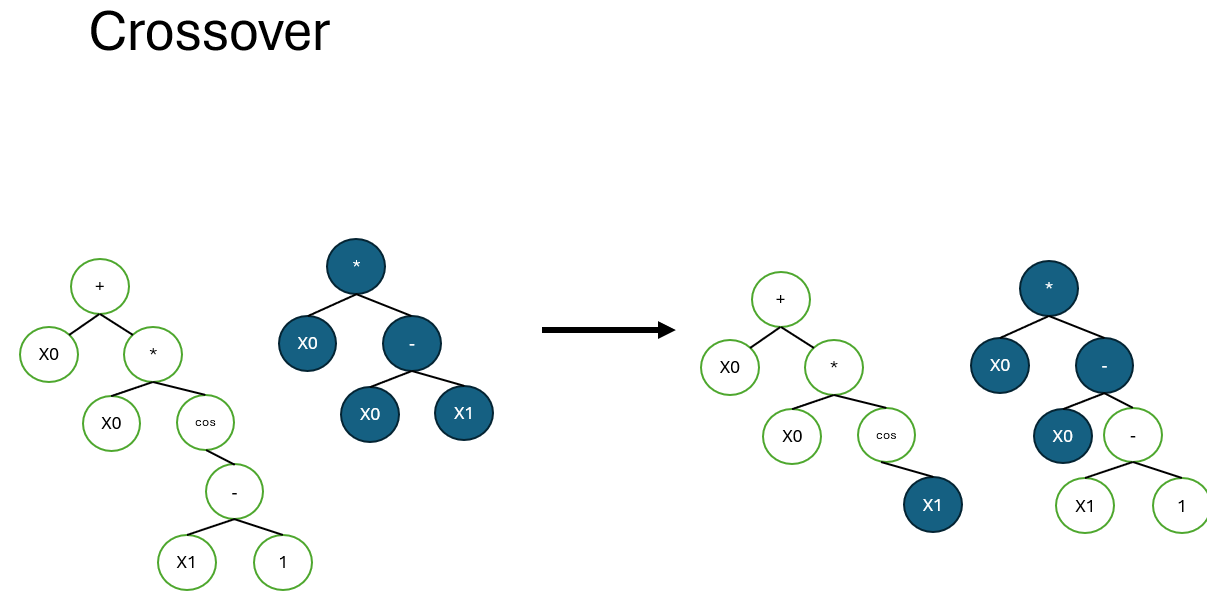

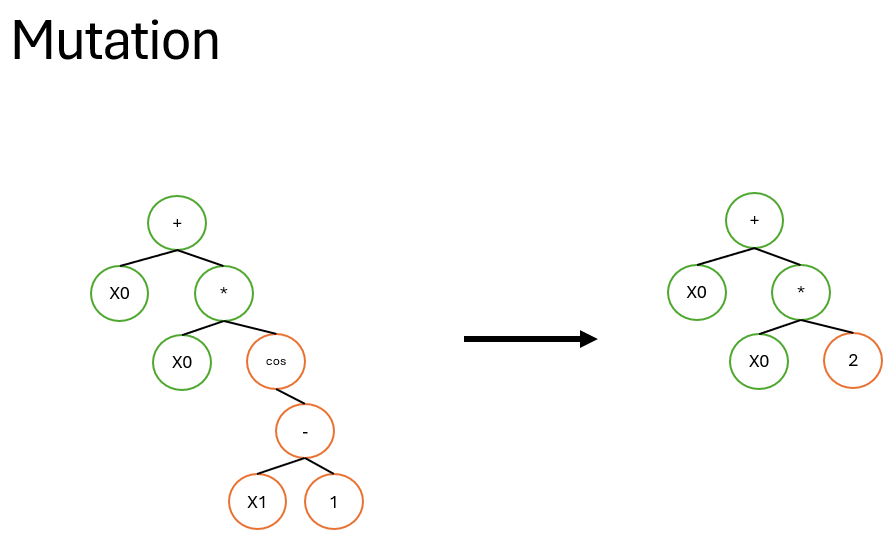

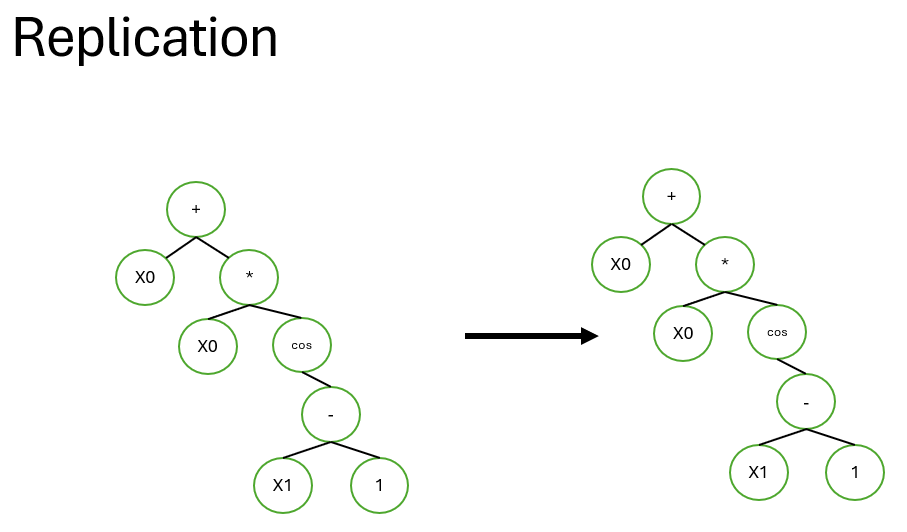

- continue to predifined thershold
  - cost function is weighted by accuracy and simplicity

# Code implementaiton
1. Using gplearn with Simulated data <br>

We generate data from this equation: <br>
$x = x_0 + v_0t + 0.5at^2$ <br>
<br>
Which is the equation to find the position of an object given time and its acceleration. <br>
We set $x_0=1$ and $v_0=2$ (just to have some numbers)

In [17]:
# (HIDE CODE)
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.random import check_random_state

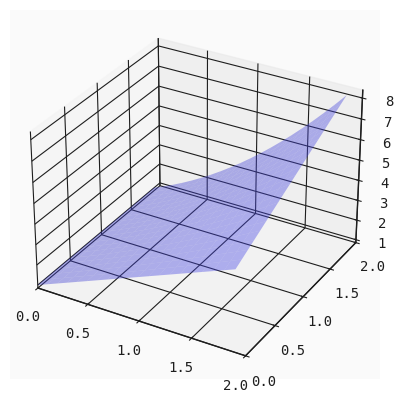

In [18]:
#equation for finding position from time and acceleration 
t = np.arange(0,2,0.1)
a = np.arange(0,2,0.1)
t,a = np.meshgrid(t,a)
y_truth = 1 + 2*t + 0.5*a*t**2 # true func.


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_xticks(np.arange(0,2.01, .5))
ax.set_yticks(np.arange(0,2.01, .5))
surf = ax.plot_surface(t,a, y_truth, rstride=1, cstride=1, alpha=.4)
plt.show()

In [19]:
# Here we generate 100 random points that follow the equation (no noise)

rng = check_random_state(0)

X_train = rng.uniform(0,2,100).reshape(50,2)
y_train = 1 + 2*X_train[:,0] + 0.5*X_train[:,1]*X_train[:,0]**2

X_test = rng.uniform(0,2,100).reshape(50,2)
y_test = 1 + 2*X_test[:,0] + 0.5*X_test[:,1]*X_test[:,0]**2

In [20]:
# Here we run the algorithm with max 30 generations and 0.01 as stopping criterion

est_gp = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=30, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, # how heavily to penalize larger equations
                           random_state=0)

In [21]:
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          91181.7        7         0.469916         0.467266      2.15m
   1    12.47          3.85264       33         0.297951         0.472789      1.38m
   2    11.29          45.1127        9         0.223551         0.196336      1.31m
   3     9.31          2.05772        9         0.208486         0.331918      1.23m
   4     8.74          2.12306       11         0.208647          0.33271      1.19m
   5     8.65          3.06786       11         0.187469          0.54295      1.22m
   6     8.80            2.632       11          0.19218          0.47815      1.09m
   7     9.85          2.98798       15         0.159436         0.207123      1.05m
   8     9.36          1.58492       11         0.189243         0.227506  

SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

If we write this out we get: <br>

$(t+(t-0.893))+((a*(0.784t))*(0.784t))$ <br>
$0.893 + 2t + 0.615at^2$ <br>

Which is almost correct!

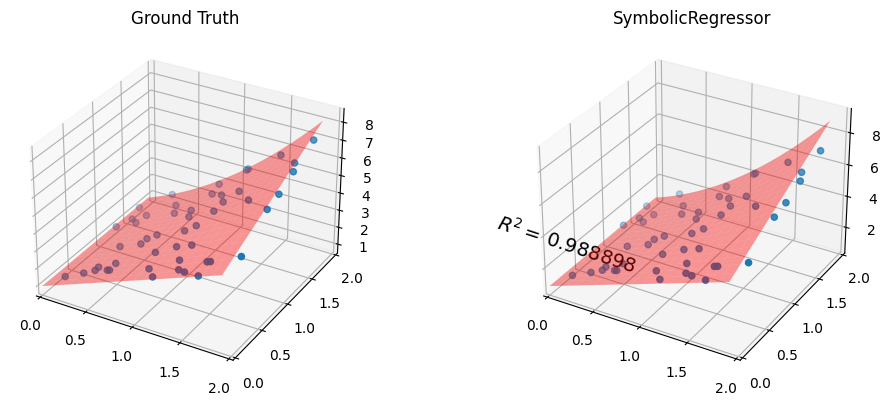

In [ ]:
# plot performance 

y_gp = est_gp.predict(np.c_[t.ravel(), a.ravel()]).reshape(t.shape)
score_gp = est_gp.score(X_test, y_test)
fig = plt.figure(figsize=(12, 10))
for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks(np.arange(0, 2.01, .5))
    ax.set_yticks(np.arange(0, 2.01, .5))
    surf = ax.plot_surface(t, a, y, rstride=1, cstride=1, color='red', alpha=0.4)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 0.1, .1, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)
plt.show()

# The Qlattice framework

<div style="display: flex; justify-content: space-between;">

  <div style="width: 80%;">
    <div>
    <ul>
      <li> Computationally efficent probabalistic approach </li>
      <li> Based on the Feynam integral from physics </li>  
      <li> Genterates simple and interpretable models </li>  
      <li> Easy to use and no extensive hyper-parameter tuning needed </li>
      <li> Can be used for both regression and classification</li>
    </ul>
  </div>

  <div style="width: 18%;">
    <strong></strong>
    <ul>
    </ul>
  </div>

</div>


**Basic process**:

1. Sample a batch of models from the QLattice (typically a few thousand).
2. Fit them using a version of backpropagation, and evaluate their performance
3. Discard the models that don't improve with repeated training.
4. Update the QLattice with the structures of the best models.
5. Start over from point 1

_This 👆 is done very easily with the auto-run method_

In [13]:
# This cell will not be part of the presentation and the data will probably be replaced with the one Aria used for consistency

# First, install the feyn package (if not already installed)
#!pip install feyn

import feyn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create a sample dataset
# Let's assume the true relationship is y = 3 * x1 + 2 * x2^2 - 5
n = 1000
np.random.seed(42)
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 3 * x1 + 2 * x2**2 - 5 + np.random.normal(0, 0.1, n)  # Adding some noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y
})

train, test = train_test_split(data, test_size=0.2, random_state=42)

True equation: y = 3 * x1 + 2 * x2^2 - 5: 
 Top 5 models: 

Model 1. 3.00639*x1 + 2.03698*(x2 - 0.00608552)**2 - 4.9871  

Model 2. 3.0096*x1 + 0.900066*(1.45338*x2 - 0.568804)*(1.55452*x2 + 0.592014) - 4.68877  

Model 3. 2.99707*x1 - 0.271638*x2 + 2.02608*(-x2 - 0.0620686)**2 - 4.99303  

Model 4. 3.00388*x1 - 1.59262*(0.0056875 - x2)**2*(0.0332533*x1 - 1.28406) - 4.98202  

Model 5. 3.02544*x1 - 1.28161*(-0.783606*x2 - 0.077314)*(-0.0511767*x1 + 2.0177*x2 - 0.19217) - 4.97197  



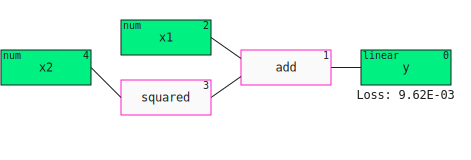

In [23]:
# Initialize the Qlattice
qlattice = feyn.QLattice(random_seed=42)

# Train the Qlattice on the data
models = qlattice.auto_run(data=train, output_name='y', n_epochs=10)

# Select the best model (based on simplicity and accuracy)
best_model = models[0]

print("True equation: y = 3 * x1 + 2 * x2^2 - 5: \n Top 5 models: \n")
for i in range(5):
    print(f'Model {i+1}. {models[i].sympify()}  \n' )

best_model

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 651 216.0" width="651" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="471" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="50.0"><title>y
linear:
scale=2.490339
scale offset=0.000000
w=0.305506
bias=-1.3169</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">y</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="59.0">linear</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">1</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>x1
linear:
scale=2.009877
scale offset=0.495316
w=1.966059
bias=-0.2870</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">x1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="80.0"><title>squared</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">squared</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">3</text><line stroke="#1E1E1E" x1="91" x2="121" y1="67.5" y2="97.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="50.0"><title>x2
linear:
scale=2.007638
scale offset=0.514429
w=0.815021
bias=0.8318</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="71.5">x2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="59.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="59.0">num</text></svg><svg class="summary" height="64" width="180" x="471" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">R2</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.992</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">RMSE</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.0988</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">MAE</text><text fill=
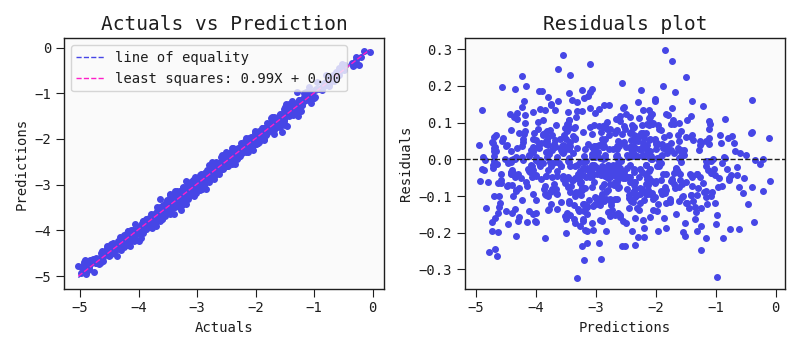

In [15]:
best_model.plot(train)
#best_model.plot(train, test)

In [ ]:
#best_model.plot(train, test)

### The code below is only the "non-auto one of the cell below only to be present in the notebook but ptobably not shown and if not only super fast

In [ ]:
# Optional, but helpful. Is best on the full dataset, not just train.
feyn.validate_data(data=train, kind='regression', output_name='y', stypes={})

models_long = []
n_epochs = 10
ql = feyn.QLattice(random_seed=42) # Instantiate a QLattice
priors = feyn.tools.estimate_priors(train, output_name='y')# Compute prior probability of inputs
ql.update_priors(priors) # Update the QLattice with priors

for epoch in range(n_epochs):
    models_long += ql.sample_models(train.columns,'y','regression') # Sample models from the QLattice
    models_long = feyn.fit_models(models_long, train) # Fit the list of models
    models_long = feyn.prune_models(models_long)  # Remove redundant and poorly performing models from the list
    feyn.show_model(models_long[0], label=f"Epoch: {epoch}", update_display=True) # Display the best model in the epoch
    ql.update(models_long) # Update QLattice with the fitted list of models (sorted by loss)

# Find the 10 best and sufficiently diverse models
best_long_models = feyn.get_diverse_models(models_long, n=10)
best_long = best_long_models[0]

Top 5 models: 

Model 1. 2.97195*x1 + 0.889785*(1.44787*x2 - 0.570716)*(1.55332*x2 + 0.594057) - 4.69198  

Model 2. 2.98349*x1 - 2.47043*exp(-0.815009*(x2 - 0.0559077)**2 - 2.0/log(exp(-0.930616*(1 - 0.69272*x2)**2 - 9.26031*(0.619269*x2 - 1)**2))**2) - 2.57966  

Model 3. -3.02215 - 1.94347*(3.26612*x1 + (0.375071 - 1.99284*x2)*(-1.12359*x2 - 0.17918) - 2.08939)/(-0.0480219*x2 - 2.10728)  

Model 4. 2.97365*x1 - 1.06223*(0.168658 - 2.68719*x2)*(0.708793*x2 + exp(-12.3729*(0.807413*x2 - 1)**2 - 10.8461*(x2 - 0.198578)**2) + 0.0253527) - 4.98884  

Model 5. 2.97446*x1 - 0.274864*x2 + 2.00201*(-x2 - 0.0621629)**2 - 4.9986  



<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 755 216.0" width="755" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="471" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="50.0"><title>y
linear:
scale=2.490339
scale offset=0.000000
w=0.357295
bias=-1.4492</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">y</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="59.0">linear</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">1</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">2</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>x2
linear:
scale=2.007638
scale offset=0.514429
w=0.773705
bias=1.3931</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">x2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>x2
linear:
scale=2.007638
scale offset=0.514429
w=0.721180
bias=0.1741</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">x2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="80.0"><title>x1
linear:
scale=2.009877
scale offset=0.495316
w=1.661829
bias=0.4373</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">x1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="89.0">num</text></svg><svg class="summary" height="64" width="180" x="471" y="0"><defs /><text fill="#1E1E1E" font-family="monospace
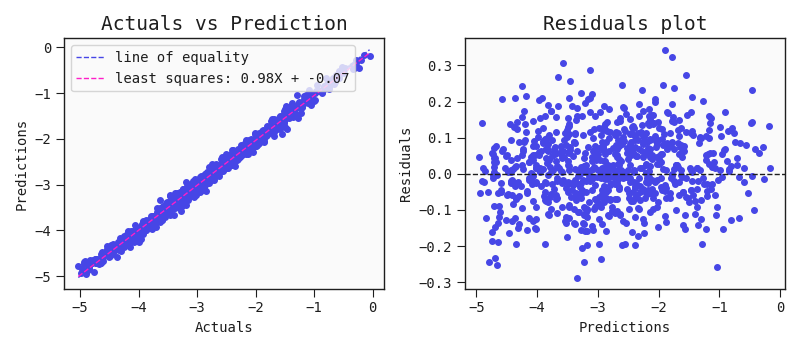
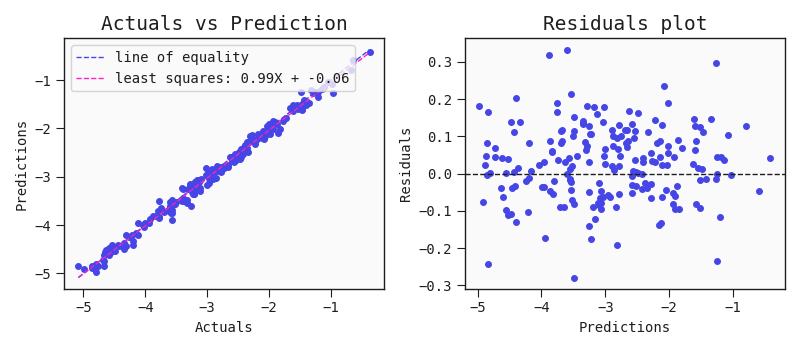

In [ ]:
print("Top 5 models: \n")
for i in range(5):
    print(f'Model {i+1}. {best_long_models[i].sympify()}  \n' )

best_long

best_long.plot(train, test)

<div style="display: flex; justify-content: space-between;">

  <div style="width: 45%;">
    <strong>Pros with SR</strong>:
    <ul>
      <li> No prior assumptions needed</li>
      <li> Can give a deeper understanding</li>
      <li> Can validate physical laws</li>
      <li> Efficent on small datasets </li>
      <li> Interpretable - no black box </li>
      <li> Gives close form expression </li>
      <li> Can provide new features in ML </li>
    </ul>
  </div>

  <div style="width: 62%;">
    <strong>Cons with SR</strong>:
    <ul>
      <li> Computationally expensive! <em>(Qlattice is better)</em> </li>
      <li> Overfitting and bloating is common </li>
      <li> Does not gurantee "true" expressions </li>
      <li> Oversimplified datasets can cause false results </li>
      <li> Stuck in local minima </li>
    </ul>
  </div>

</div>


# (Let's observe limitations from) Real life examples
- Could we obtain gas law in a form, close to known expression $P \times V  = n \times R \times T$ ?

In [ ]:
import pandas as pd

In [ ]:
def get_X_dict(X_train_df):
  return dict(
      zip(X_train_df.columns,
   [f'X{i}' for i in range(len(X_train_df.columns))]))

In [ ]:
# dataset for gas measurements from NIST "https://webbook.nist.gov/chemistry/fluid/"
data_complete = pd.read_excel('gas_law_data.xlsx')
data = data_complete[data_complete.Compound == 'Xe']
# dropping values that are not presented in the original formula
X_train_df = data.drop(columns = ['Pressure (MPa)', 'Phase', 'Compound','Volume (ml/g)','Cv (J/mol*K)', 'Cp (J/mol*K)','Joule-Thomson (K/MPa)', 'Viscosity (uPa*s)', 'Therm. Cond. (W/m*K)', 'Sound Spd. (m/s)'])

# get data to train
X_train = X_train_df.values
y_train = data['Pressure (MPa)']

In [ ]:
#Train symbolic regression
est_gp_gas_law = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=30, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp_gas_law.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.56      1.17694e+18        5       0.00987838       0.00737402      3.23m


SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
# HIDE CODE
get_X_dict(X_train_df)

{'Temperature (K)': 'X0',
 'Density (g/ml)': 'X1',
 'Internal Energy (kJ/mol)': 'X2',
 'Enthalpy (kJ/mol)': 'X3',
 'Entropy (J/mol*K)': 'X4',
 'Compound mol. Weight (g/mol)': 'X5'}

## $P (MPa) = T (K) \times \frac{p (g/mL)}{U(kJ/mol)}$

## $P (MPa) = T (K) \times \frac{m (g)}{V(mL) \times U(kJ/mol)}$

## $P (MPa) \times V(mL) = \frac{m (g)}{U(kJ/mol)} \times T (K)  $
###Unfortunately, that is not a gas law as we know it: $P \times V = n \times R \times T $



In [ ]:
# HIDE CODE
test_df = data[['Temperature (K)','Density (g/ml)','Internal Energy (kJ/mol)', 'Pressure (MPa)','Volume (ml/g)']]
test_df['calculated Pressure (MPa)'] = test_df['Temperature (K)']*(test_df['Density (g/ml)']/test_df['Internal Energy (kJ/mol)'])
test_df['Pressure calculation residual (MPa)'] = test_df['Pressure (MPa)'] - test_df['calculated Pressure (MPa)']

<ipython-input-13-1366c215b6ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['calculated Pressure (MPa)'] = test_df['Temperature (K)']*(test_df['Density (g/ml)']/test_df['Internal Energy (kJ/mol)'])
<ipython-input-13-1366c215b6ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Pressure calculation residual (MPa)'] = test_df['Pressure (MPa)'] - test_df['calculated Pressure (MPa)']


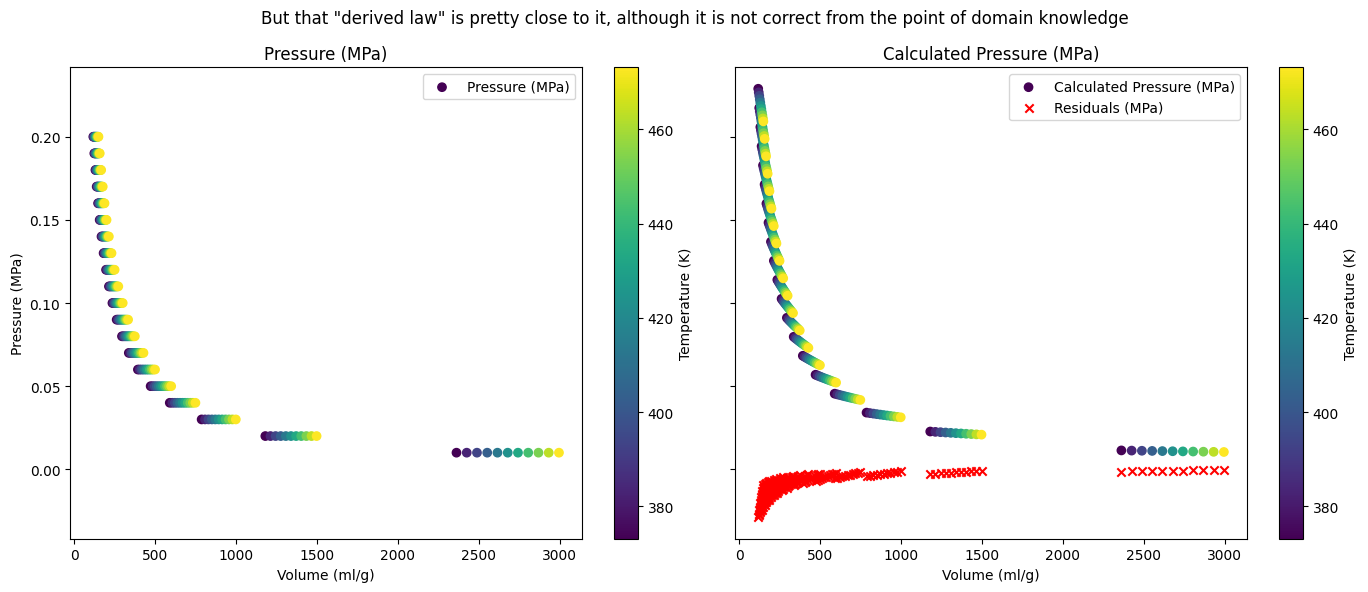

In [ ]:
# HIDE CODE
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('But that "derived law" is pretty close to it, although it is not correct from the point of domain knowledge')

# Plot for 'Pressure (MPa)'
scatter1 = axs[0].scatter(test_df['Volume (ml/g)'], test_df['Pressure (MPa)'], c=test_df['Temperature (K)'], cmap='viridis', label='Pressure (MPa)')
axs[0].set_title('Pressure (MPa)')
axs[0].set_xlabel('Volume (ml/g)')
axs[0].set_ylabel('Pressure (MPa)')
cbar1 = plt.colorbar(scatter1, ax=axs[0])
cbar1.set_label('Temperature (K)')
axs[0].legend()

# Plot for 'Calculated Pressure (MPa)'
scatter2 = axs[1].scatter(test_df['Volume (ml/g)'], test_df['calculated Pressure (MPa)'], c=test_df['Temperature (K)'], cmap='viridis', label='Calculated Pressure (MPa)')
scatter2_residuals = axs[1].scatter(test_df['Volume (ml/g)'], test_df['Pressure calculation residual (MPa)'], c='red', marker='x', label='Residuals (MPa)')
axs[1].set_title('Calculated Pressure (MPa)')
axs[1].set_xlabel('Volume (ml/g)')
cbar2 = plt.colorbar(scatter2, ax=axs[1])
cbar2.set_label('Temperature (K)')
axs[1].legend()

plt.tight_layout()
plt.show()

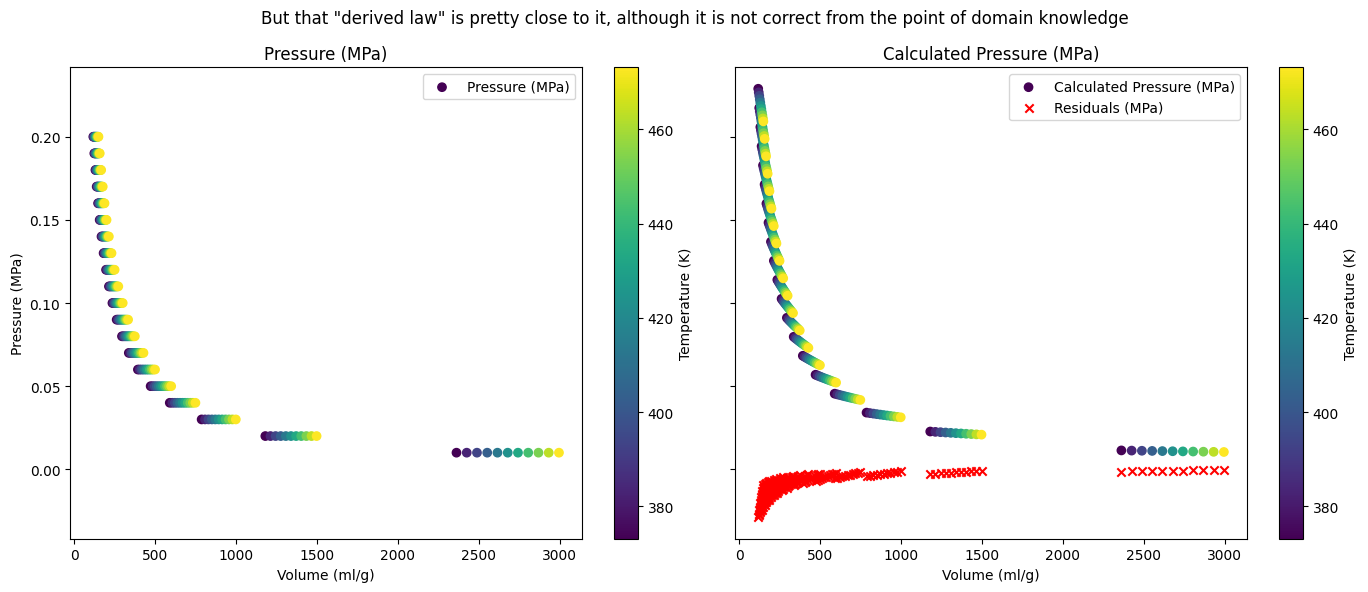

### Therefore, while Symbolic Regression could yield seemingly convincing results, the results of it have to be verified from the standpoint of existing domain knowledge, if that is possible

In [ ]:
#Train symbolic regression, BUT lets change random state
est_gp_gas_law_trial2 = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=30, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=42)
est_gp_gas_law_trial2.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.33      4.63513e+21        7       0.00916471        0.0116605      2.50m


SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=42, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
get_X_dict(X_train_df)

{'Temperature (K)': 'X0',
 'Density (g/ml)': 'X1',
 'Internal Energy (kJ/mol)': 'X2',
 'Enthalpy (kJ/mol)': 'X3',
 'Entropy (J/mol*K)': 'X4',
 'Compound mol. Weight (g/mol)': 'X5'}

### Result of Symbolic regression could depend on initial random state: here exactly the same code was used with `random_state = 42`, yielding *another* formula for the same dataset

## $P (MPa) \times V(mL) = 2 \times U(kJ/mol) \times {m (g)}$
(as a reminder, with `random_state = 0` formula yielded was  $P (MPa) \times V(mL) = \frac{m (g)}{U(kJ/mol)} \times T (K)  $)

### And that is certainly not a gas law either (expect something like $P \times V = n \times R \times T $)

# Conlcusion

### Optimistic point of view
- Symbolic regression allows to finding of **unnoticed or hidden dependencies** in data, expressing results in concise manner - *formulas are human-readable outputs*
- **No need to have model predefined** (unlike in Linear regression, for example)
- ***Automatic* feature engineering** (it will combine features for you, to get better fitting)



### Pessimistic point of view
- **Random initialization and stochastic nature of algorithm** - results of Symbolic regression might be unstable, using cross-validation to assess model stability or making an ensemble of symbolic regression models might be a solution
- **Noisy data** can lead the model to overfit the noise
- **Highly dimensional data** can make it difficult to find meaningful relationships
- **Insufficient data** might make it diffucult to find formula to describe the data
- **Complex and chaotic systems** might not work due to high sensitivity to initial conditions (describing **Lorenz system** with Symbolic regression would be exremely difficult if possible)

### Where to use
- Data where you **expect some dependencies in the form of expressions**
- Data with **relatively low noise**
- **Deterministic systems** preferable for study (altough you might not know if your study is the one)
- **Structured data** (not images, and not audio stream, for instance)

### Where NOT to use
- Data with **many features**
- **(Very) Noisy data**
- Images or **any data with non-symbolic relationships**
- **Complex/Chaotic** data (don't try on *short-term weather data*, but could work on *long-term weather data*)

# Sources:
- https://predictivemodeler.com/2020/05/12/python-symbolic-regression/
- https://medium.com/@wilstrup/symbolic-regression-a-simple-and-friendly-introduction-16bcadbe870a
- https://en.wikipedia.org/wiki/Symbolic_regression
- https://github.com/trevorstephens/gplearn/blob/main/doc/gp_examples.ipynb
- (https://docs.abzu.ai/docs/guides/getting_started/qlattice)
- (https://docs.abzu.ai/docs/api_reference/feyn)
- (https://link.springer.com/article/10.1007/s11831-023-09922-z)
